In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
import joblib
import warnings

warnings.filterwarnings("ignore")


In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# **LOAD DATASET**

In [3]:
df = pd.read_csv("DailyDelhiClimate.csv")
df.sample(15)


,date,meantemp,humidity,wind_speed,meanpressure
497,2014-05-13,25.250000,65.750000,9.962500,1008.375000
632,2014-09-25,30.000000,52.500000,9.725000,1007.750000
730,2015-01-01,14.750000,72.000000,0.925000,1017.500000
1438,2016-12-09,19.416667,68.125000,1.312500,1013.416667
729,2014-12-31,12.375000,67.125000,2.787500,1016.875000
583,2014-08-07,31.125000,65.375000,6.950000,997.000000
1475,2017-01-14,13.200000,74.280000,5.276000,1018.840000
796,2015-03-08,19.500000,74.125000,7.887500,1015.375000
1242,2016-05-27,38.272727,26.090909,15.318182,999.954545
1202,2016-04-17,34.666667,23.866667,9.386667,1002.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


# CLEAN **DATASET**

In [5]:
df['date'] = pd.to_datetime(df['date'])


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns = df.columns.str.lower()

In [9]:
print("\nSummary after cleaning:")
print(df.describe())


Summary after cleaning:
                                date     meantemp     humidity   wind_speed  \
count                           1576  1576.000000  1576.000000  1576.000000   
mean   2015-02-27 10:15:50.253807104    25.221918    60.445229     6.899262   
min              2013-01-01 00:00:00     6.000000    13.428571     0.000000   
25%              2014-01-29 18:00:00    18.500000    49.750000     3.700000   
50%              2015-02-27 12:00:00    27.166667    62.440476     6.363571   
75%              2016-03-27 06:00:00    31.142857    72.125000     9.262500   
max              2017-04-24 00:00:00    38.714286   100.000000    42.220000   
std                              NaN     7.345014    16.979994     4.510725   

       meanpressure  
count   1576.000000  
mean    1010.593178  
min       -3.041667  
25%     1001.875000  
50%     1009.055556  
75%     1015.200000  
max     7679.333333  
std      175.242704  


# handle **outliers**

In [10]:

features_for_outlier = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
lof = LocalOutlierFactor()
outliers = lof.fit_predict(features_for_outlier)
df = df[outliers != -1]

# Feature Selection and **Scaling**

In [11]:
df['month'] = df['date'].dt.month
df['dayofyear'] = df['date'].dt.dayofyear

features = ['humidity', 'wind_speed', 'meanpressure', 'month','dayofyear']
target = 'meantemp'

X = df[features].values
y = df[target].values

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1230
Testing samples: 308


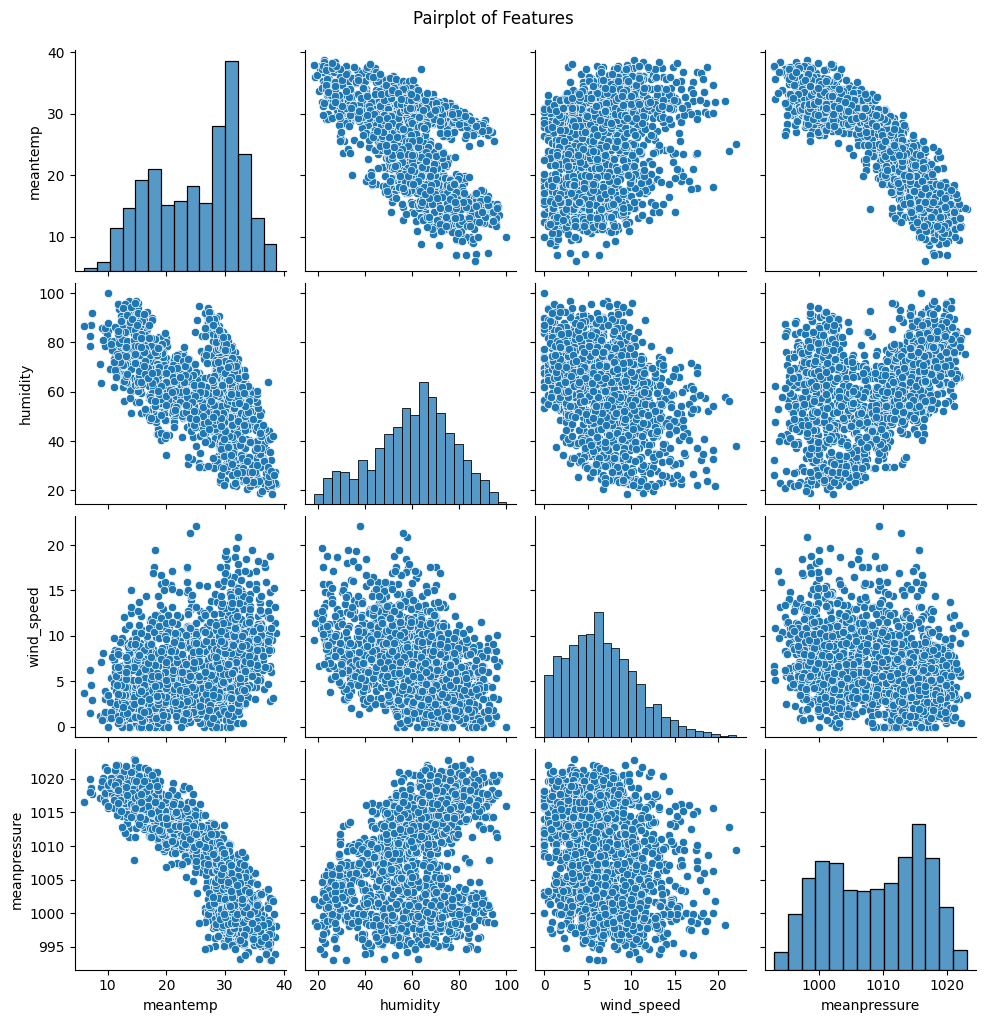

In [15]:
import seaborn as sns
sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

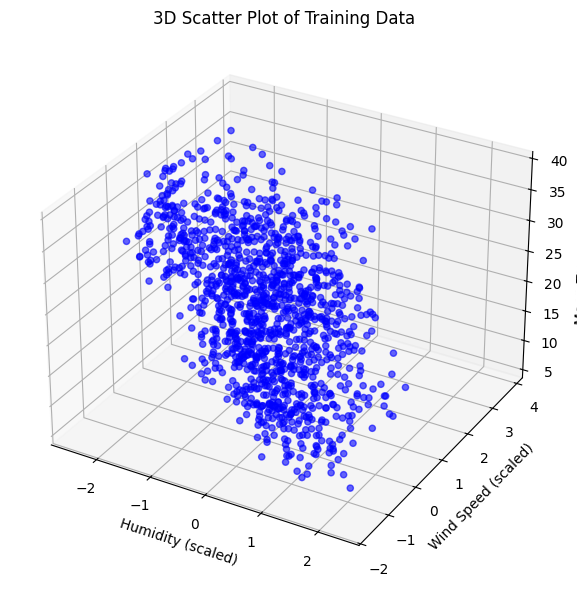

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, alpha=0.6, color='blue')
ax.set_xlabel('Humidity (scaled)')
ax.set_ylabel('Wind Speed (scaled)')
ax.set_zlabel('Mean Temperature')
ax.set_title('3D Scatter Plot of Training Data')
plt.tight_layout()
plt.show()

# TRAIN THE DATA

In [17]:
model = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42
)
model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


# Predictions and **Evaluation**

In [18]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")



Model Evaluation:
R² Score: 0.9459
MAE: 1.34
MSE: 2.91


In [19]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.graph_objects as go


humidity_range = np.linspace(df['humidity'].min(), df['humidity'].max(), 30)
wind_speed_range = np.linspace(df['wind_speed'].min(), df['wind_speed'].max(), 30)
H, W = np.meshgrid(humidity_range, wind_speed_range)

avg_pressure = df['meanpressure'].mean()
avg_month = df['month'].median()
avg_dayofyear = df['dayofyear'].median()

grid_input = np.c_[
    H.ravel(), W.ravel(),
    np.full(H.size, avg_pressure),
    np.full(H.size, avg_month),
    np.full(H.size, avg_dayofyear)
]

grid_scaled = scaler.transform(grid_input)
Z = model.predict(grid_scaled).reshape(H.shape)

fig = go.Figure(data=[
    go.Surface(x=H, y=W, z=Z, colorscale='Viridis', opacity=0.9)
])

fig.update_layout(
    title='Interactive 3D Surface: Temp vs Humidity & Wind Speed',
    scene=dict(
        xaxis_title='Humidity',
        yaxis_title='Wind Speed',
        zaxis_title='Predicted Temp'
    ),
    width=800,
    height=600,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [21]:
joblib.dump(model, "weather_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModel and scaler saved to disk.")


Model and scaler saved to disk.
